In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('all_data_revised.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,event_date,country,counts,population,events_per_capita,gdp_per_capita,Western,Asian,South American,public_trust_percentage
0,2021,Australia,681,25685412,2.651310,60697.245436,1,0,0,51.9
1,2022,Australia,794,26005540,3.053196,65099.845912,1,0,0,49.9
2,2020,Austria,354,8916864,3.970006,48789.497850,1,0,0,62.6
3,2021,Austria,562,8955797,6.275265,53517.890451,1,0,0,61.0
4,2022,Austria,294,9041851,3.251547,52084.681195,1,0,0,61.0
...,...,...,...,...,...,...,...,...,...,...
113,2021,United Kingdom,1585,67026292,2.364744,46869.759058,1,0,0,39.5
114,2022,United Kingdom,1745,66971395,2.605590,46125.255751,1,0,0,39.5
115,2020,United States,21585,331511512,6.511086,63528.634303,1,0,0,46.5
116,2021,United States,13147,332031554,3.959563,70219.472454,1,0,0,40.5


In [3]:
def linear_regression(X, y):
    """performs the linear perceptron algorithm which takes in an original X matrix and a y vector
    Args:
        X (2d-array): represents a matrix of a bias column with numeric values representative of the x features 
        y (1d-array): represents a vector of labels (-1 or 1)
    Returns:
        w (1d-array): the final weight vector that determines the direction and orientation of the line of best fit
    """
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 

In [4]:
def linreg_predict(Xnew, ynew, m):
    """takes in the X matrix, y vector, and the m vector which contains the coefficients of the calculated line of best fit and outputs a dictionary that contains the predicted y values, the residuals, the mse, and the r2 score

    Args:
        Xnew (1d or 2d-array): which includes all the desired predictor feature values (not including the bias term)
        y (1d-array):  includes all corresponding output values to Xnew
        m (1d-array): contains the coefficients from the line of best fit function
    Returns:
        preds (dictionary): dictionary containing the predicted y values, the residuals between the y values and the predicted y values, the mse, and the r2 score
    """
    linreg_stats = {}
    ypreds = np.matmul(Xnew, m)
    linreg_stats['ypreds'] = ypreds
    resids = ynew - ypreds
    linreg_stats['resids'] = resids
    
    #the mse function
    mse = np.square(resids).mean()
    linreg_stats['mse'] = mse
    linreg_stats['r2'] = r2_score(ynew, ypreds)
    
    return linreg_stats

In [5]:
df_scaled = pd.DataFrame()
df_scaled['event_date'] = df['event_date']
df_scaled['country'] = df['country']
df_scaled['Western'] = df['Western']
df_scaled['Asian'] = df['Asian']
df_scaled['South American'] = df['South American']
df_scaled['counts'] = df['counts']

# scaling my data 
for feat in df.columns[2:]:
        if feat != 'Western' and feat != 'Asian' and feat != 'South American' and feat != 'counts':
                df_scaled[f'{feat}_scaled'] = ((df[feat] - df[feat].mean()) / df[feat].std()).round(3)
df_scaled

,event_date,country,Western,Asian,South American,counts,population_scaled,events_per_capita_scaled,gdp_per_capita_scaled,public_trust_percentage_scaled
0,2021,Australia,1,0,0,681,-0.283,-0.834,0.720,0.288
1,2022,Australia,1,0,0,794,-0.278,-0.699,0.877,0.168
2,2020,Austria,1,0,0,354,-0.524,-0.391,0.295,0.930
3,2021,Austria,1,0,0,562,-0.523,0.384,0.464,0.834
4,2022,Austria,1,0,0,294,-0.522,-0.632,0.412,0.834
...,...,...,...,...,...,...,...,...,...,...
113,2021,United Kingdom,1,0,0,1585,0.311,-0.930,0.226,-0.457
114,2022,United Kingdom,1,0,0,1745,0.310,-0.849,0.200,-0.457
115,2020,United States,1,0,0,21585,4.111,0.463,0.821,-0.036
116,2021,United States,1,0,0,13147,4.118,-0.394,1.060,-0.397


In [6]:
# making the corresponding correlation matrix to identify high correlation between features 
df_scaled.corr()

/var/folders/z7/152736054bv0sl_wm9ygspfr0000gn/T/ipykernel_56823/2453275367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scaled.corr() # how does correlation matrix work with normalizing data ???


,event_date,Western,Asian,South American,counts,population_scaled,events_per_capita_scaled,gdp_per_capita_scaled,public_trust_percentage_scaled
event_date,1.000000,0.418741,-0.099151,-0.212938,0.019466,-0.062214,0.145310,0.255186,0.230861
Western,0.418741,1.000000,-0.311234,-0.668411,-0.022501,-0.285831,0.235286,0.475514,0.430178
Asian,-0.099151,-0.311234,1.000000,-0.095027,-0.023613,0.245017,-0.280537,-0.012674,-0.105139
South American,-0.212938,-0.668411,-0.095027,1.000000,0.162820,0.370382,-0.249832,-0.495538,-0.385211
counts,0.019466,-0.022501,-0.023613,0.162820,1.000000,0.813220,0.131141,-0.040171,-0.187744
population_scaled,-0.062214,-0.285831,0.245017,0.370382,0.813220,1.000000,-0.246147,-0.147677,-0.273770
events_per_capita_scaled,0.145310,0.235286,-0.280537,-0.249832,0.131141,-0.246147,1.000000,0.193235,0.134652
gdp_per_capita_scaled,0.255186,0.475514,-0.012674,-0.495538,-0.040171,-0.147677,0.193235,1.000000,0.710791
public_trust_percentage_scaled,0.230861,0.430178,-0.105139,-0.385211,-0.187744,-0.273770,0.134652,0.710791,1.000000


In [38]:

from sklearn.preprocessing import PolynomialFeatures

#selecting my features for my X matrix
X = df_scaled[['public_trust_percentage_scaled', 'gdp_per_capita_scaled', 'Western', 'Asian', 'South American', 'population_scaled']]
X['public_trust_x_gdp_per_capita'] = X['public_trust_percentage_scaled'] * X['gdp_per_capita_scaled']

y = df_scaled['events_per_capita_scaled']

# polynomial features to the 3rd degree
poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X[['public_trust_percentage_scaled', 'gdp_per_capita_scaled', 'population_scaled']])  # Apply only to public_trust
X_poly = np.concatenate((X_poly, X[['Western', 'Asian', 'South American']]), axis=1)
# what each column in X_poly corresponds to:
    # 1, public trust, gdp per capita, population, public trust ^ 2, public trust x gdp per capita, public trust x population, gdp per cpaita ^ 2, gdp per capita * population, population ^ 2, public trust ^ 3, public trust ^ 2 * gdp per capita, public trust ^ 2 * population, gdp per capita ^ 2 * public trust, gdp per capita * population * public trust, public trust * population ^ 2, gdp ^ 3, gdp ^ 2 * population, population ^ 2 * gdp, population ^ 3

# create and fit model
lobf = linear_regression(X_poly, y)
predictions = linreg_predict(X_poly, y, lobf)

# --- Predict and Evaluate ---
print("mse:", predictions['mse'], ", r2:", predictions['r2'])

mse: 0.5804341184867209 , r2: 0.4145802878137098


/var/folders/z7/152736054bv0sl_wm9ygspfr0000gn/T/ipykernel_56823/2947661109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['public_trust_x_gdp_per_capita'] = X['public_trust_percentage_scaled'] * X['gdp_per_capita_scaled']


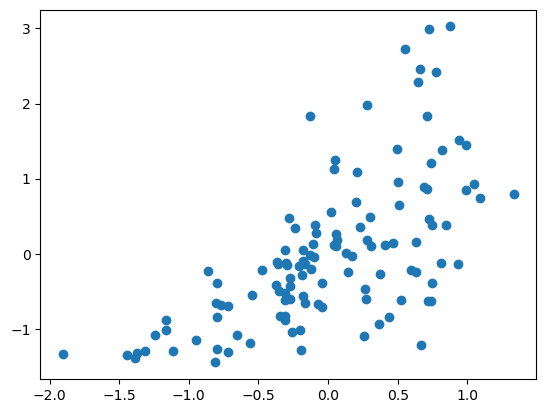

In [39]:
plt.scatter(x=predictions['ypreds'], y=y)

In [42]:
# plotting each of the highest order X features against the residuals
plot_df = pd.DataFrame({
    'public_trust_percentage_scaled_3rd': X_poly[:, 10], 
    'gdp_per_capita_scaled_3rd': X_poly[:, 16],
    'population_scaled_3rd': X_poly[:, 19],
    'Western': X_poly[:, 20],
    'Asian': X_poly[:, 21],
    'South_America': X_poly[:, 22],
    'residuals': y - predictions['ypreds']
})

# Plot each feature against residuals
for feature in plot_df.columns[:-1]:
    fig = px.scatter(plot_df, x=feature, y='residuals',
                     title=f"Residuals vs. {feature} (X feature)")
    fig.show()

In [21]:
# THIS IS GOOD FOR CV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# cross validation to see if my model works 
X = df_scaled[['public_trust_percentage_scaled', 'gdp_per_capita_scaled', 'Western', 'Asian', 'South American', 'population_scaled']]
X['public_trust_x_gdp_per_capita'] = X['public_trust_percentage_scaled'] * X['gdp_per_capita_scaled']

y = df_scaled['events_per_capita_scaled']

# polynomial features to the 3rd degree
poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X[['public_trust_percentage_scaled', 'gdp_per_capita_scaled', 'population_scaled']])  # Apply only to public_trust
X_poly = np.concatenate((X_poly, X[['Western', 'Asian', 'South American']]), axis=1)

# cross validation 
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# create and fit model
cv_lobf = linear_regression(X_train, y_train)
cv_predictions = linreg_predict(X_test, y_test, cv_lobf)

# --- Predict and Evaluate ---
print("mse:", cv_predictions['mse'], ", r2:", cv_predictions['r2'])

mse: 0.9003313225708429 , r2: 0.31927802912671044


/var/folders/z7/152736054bv0sl_wm9ygspfr0000gn/T/ipykernel_56823/2039104664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['public_trust_x_gdp_per_capita'] = X['public_trust_percentage_scaled'] * X['gdp_per_capita_scaled']


In [43]:
residuals = y - predictions['ypreds']

residual_df = pd.DataFrame({'residuals': residuals, 'predicted_values': predictions['ypreds']})

fig = px.scatter(residual_df, x='predicted_values', y='residuals',
                 title="Residuals vs. Predicted Values")

fig.show()

In [44]:
df = pd.DataFrame({'y': y, 'predicted_values': predictions['ypreds']})

fig = px.scatter(df, x='predicted_values', y='y',
                 title="Y vs. Predicted Values")

fig.show()

In [45]:
residuals = y - predictions['ypreds']

residual_df = pd.DataFrame({'residuals': residuals, 'index': range(len(residuals))})

fig = px.scatter(residual_df, x='index', y='residuals',
                 title="Residuals vs. Index")

fig.show()

In [46]:
fig = px.histogram(x=y - predictions['ypreds'], title='Histogram of Residuals', labels={'x': 'Residuals', 'y': 'Frequency'})
fig.update_layout(xaxis_title='Residuals', yaxis_title='Frequency', xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()